本文内容均来自pandas官方教程[10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min)

# Object creation

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [4]:
import numpy as np
import pandas as pd

s = pd.Series([1,3,5, np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range("20130101",periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.507239,0.509756,-0.563716,-1.456816
2013-01-02,1.775109,0.847954,-1.278865,1.162360
2013-01-03,-0.849258,-0.332700,-0.718375,0.714685
2013-01-04,0.495317,-0.822824,1.125858,0.794003
2013-01-05,1.292993,0.610447,-0.602164,0.815642
2013-01-06,1.159929,0.094402,-0.918566,-0.221957


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [10]:
df2 = pd.DataFrame(
        {
            "A": 1.0,
            "B": pd.Timestamp("20130102"),
            "C": pd.Series(1, index=list(range(4)), dtype="float32"),
            "D": np.array([3] * 4, dtype="int32"),
            "E": pd.Categorical(["test", "train", "test", "train"]),
            "F": "foo",
        }
       )
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing data

## basic

In [13]:
df.head()

,A,B,C,D
2013-01-01,1.507239,0.509756,-0.563716,-1.456816
2013-01-02,1.775109,0.847954,-1.278865,1.162360
2013-01-03,-0.849258,-0.332700,-0.718375,0.714685
2013-01-04,0.495317,-0.822824,1.125858,0.794003
2013-01-05,1.292993,0.610447,-0.602164,0.815642


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,0.495317,-0.822824,1.125858,0.794003
2013-01-05,1.292993,0.610447,-0.602164,0.815642
2013-01-06,1.159929,0.094402,-0.918566,-0.221957


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

## DataFrame.to_numpy

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [18]:
df.to_numpy()

array([[ 1.50723929,  0.5097562 , -0.56371555, -1.45681582],
       [ 1.77510935,  0.84795419, -1.27886523,  1.16235996],
       [-0.84925797, -0.33270005, -0.71837478,  0.71468546],
       [ 0.49531747, -0.82282351,  1.12585837,  0.79400315],
       [ 1.29299347,  0.61044735, -0.60216382,  0.8156422 ],
       [ 1.15992853,  0.09440185, -0.91856605, -0.22195676]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [29]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

## sort

In [30]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.896888,0.151173,-0.492638,0.301320
std,0.957097,0.634199,0.835117,0.978201
min,-0.849258,-0.822824,-1.278865,-1.456816
25%,0.661470,-0.225925,-0.868518,0.012204
50%,1.226461,0.302079,-0.660269,0.754344
75%,1.453678,0.585275,-0.573328,0.810232
max,1.775109,0.847954,1.125858,1.162360


In [31]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.507239,1.775109,-0.849258,0.495317,1.292993,1.159929
B,0.509756,0.847954,-0.332700,-0.822824,0.610447,0.094402
C,-0.563716,-1.278865,-0.718375,1.125858,-0.602164,-0.918566
D,-1.456816,1.162360,0.714685,0.794003,0.815642,-0.221957


In [36]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.456816,-0.563716,0.509756,1.507239
2013-01-02,1.162360,-1.278865,0.847954,1.775109
2013-01-03,0.714685,-0.718375,-0.332700,-0.849258
2013-01-04,0.794003,1.125858,-0.822824,0.495317
2013-01-05,0.815642,-0.602164,0.610447,1.292993
2013-01-06,-0.221957,-0.918566,0.094402,1.159929


In [37]:
df.sort_values(by="B")

,A,B,C,D
2013-01-04,0.495317,-0.822824,1.125858,0.794003
2013-01-03,-0.849258,-0.332700,-0.718375,0.714685
2013-01-06,1.159929,0.094402,-0.918566,-0.221957
2013-01-01,1.507239,0.509756,-0.563716,-1.456816
2013-01-05,1.292993,0.610447,-0.602164,0.815642
2013-01-02,1.775109,0.847954,-1.278865,1.162360


# Selection

## Getting

In [40]:
df["A"] # same as df.A

2013-01-01    1.507239
2013-01-02    1.775109
2013-01-03   -0.849258
2013-01-04    0.495317
2013-01-05    1.292993
2013-01-06    1.159929
Freq: D, Name: A, dtype: float64

In [41]:
df[0:3]

,A,B,C,D
2013-01-01,1.507239,0.509756,-0.563716,-1.456816
2013-01-02,1.775109,0.847954,-1.278865,1.162360
2013-01-03,-0.849258,-0.332700,-0.718375,0.714685


In [42]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,1.775109,0.847954,-1.278865,1.162360
2013-01-03,-0.849258,-0.332700,-0.718375,0.714685
2013-01-04,0.495317,-0.822824,1.125858,0.794003


## Selection by label

In [44]:
df.loc[dates[0]]

A    1.507239
B    0.509756
C   -0.563716
D   -1.456816
Name: 2013-01-01 00:00:00, dtype: float64

In [45]:
df.loc[:,["A","B"]]

,A,B
2013-01-01,1.507239,0.509756
2013-01-02,1.775109,0.847954
2013-01-03,-0.849258,-0.332700
2013-01-04,0.495317,-0.822824
2013-01-05,1.292993,0.610447
2013-01-06,1.159929,0.094402


<font size=4 color=red>注意20130104包含在内</font>

In [47]:
df.loc["20130102":"20130104",["A","B"]] 

,A,B
2013-01-02,1.775109,0.847954
2013-01-03,-0.849258,-0.332700
2013-01-04,0.495317,-0.822824


In [54]:
# Reduction in the dimensions of the returned object:
df.loc["20130102",["A","B"]]

A    1.775109
B    0.847954
Name: 2013-01-02 00:00:00, dtype: float64

In [56]:
df.loc[dates[0], "A"]

1.507239292458101

<font size=4 color=red>For getting fast access to a scalar (equivalent to the prior method):</font>

In [58]:
df.at[dates[0], "A"]

1.507239292458101

## Selection by position

In [59]:
df.iloc[3]

A    0.495317
B   -0.822824
C    1.125858
D    0.794003
Name: 2013-01-04 00:00:00, dtype: float64

In [60]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.495317,-0.822824
2013-01-05,1.292993,0.610447


In [61]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.775109,-1.278865
2013-01-03,-0.849258,-0.718375
2013-01-05,1.292993,-0.602164


In [62]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.775109,0.847954,-1.278865,1.162360
2013-01-03,-0.849258,-0.332700,-0.718375,0.714685


In [63]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.509756,-0.563716
2013-01-02,0.847954,-1.278865
2013-01-03,-0.332700,-0.718375
2013-01-04,-0.822824,1.125858
2013-01-05,0.610447,-0.602164
2013-01-06,0.094402,-0.918566


In [64]:
df.iloc[1,1]

0.8479541851392837

<font size=4 color=red>For getting fast access to a scalar (equivalent to the prior method):</font>

In [65]:
df.iat[1, 1]

0.8479541851392837

## Boolean indexing

In [67]:
df[df["A"] > 0 ]

,A,B,C,D
2013-01-01,1.507239,0.509756,-0.563716,-1.456816
2013-01-02,1.775109,0.847954,-1.278865,1.162360
2013-01-04,0.495317,-0.822824,1.125858,0.794003
2013-01-05,1.292993,0.610447,-0.602164,0.815642
2013-01-06,1.159929,0.094402,-0.918566,-0.221957


In [68]:
df[df>0]

,A,B,C,D
2013-01-01,1.507239,0.509756,NaN,NaN
2013-01-02,1.775109,0.847954,NaN,1.162360
2013-01-03,NaN,NaN,NaN,0.714685
2013-01-04,0.495317,NaN,1.125858,0.794003
2013-01-05,1.292993,0.610447,NaN,0.815642
2013-01-06,1.159929,0.094402,NaN,NaN


<font size=4 color=red>函数isin</font>

In [71]:
df2 = df.copy()
df2["E"] = ["one","one","two","three","four","three"]
df2

,A,B,C,D,E
2013-01-01,1.507239,0.509756,-0.563716,-1.456816,one
2013-01-02,1.775109,0.847954,-1.278865,1.162360,one
2013-01-03,-0.849258,-0.332700,-0.718375,0.714685,two
2013-01-04,0.495317,-0.822824,1.125858,0.794003,three
2013-01-05,1.292993,0.610447,-0.602164,0.815642,four
2013-01-06,1.159929,0.094402,-0.918566,-0.221957,three


In [72]:
df2[df2["E"].isin(["two","four"])]

,A,B,C,D,E
2013-01-03,-0.849258,-0.332700,-0.718375,0.714685,two
2013-01-05,1.292993,0.610447,-0.602164,0.815642,four


## Setting

Setting a new column automatically aligns the data by the indexes.

In [74]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range("20130102",periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [75]:
df["F"] = s1

In [77]:
# 注意F列
df

,A,B,C,D,F
2013-01-01,1.507239,0.509756,-0.563716,-1.456816,NaN
2013-01-02,1.775109,0.847954,-1.278865,1.162360,1.0
2013-01-03,-0.849258,-0.332700,-0.718375,0.714685,2.0
2013-01-04,0.495317,-0.822824,1.125858,0.794003,3.0
2013-01-05,1.292993,0.610447,-0.602164,0.815642,4.0
2013-01-06,1.159929,0.094402,-0.918566,-0.221957,5.0


In [79]:
df.at[dates[0],"A"] = 0

In [80]:
df.iat[0, 1] = 0

6

In [87]:
# len(df)计算行数
df.loc[:,"D"] = np.array([5]*len(df))

In [86]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.563716,5,NaN
2013-01-02,1.775109,0.847954,-1.278865,5,1.0
2013-01-03,-0.849258,-0.332700,-0.718375,5,2.0
2013-01-04,0.495317,-0.822824,1.125858,5,3.0
2013-01-05,1.292993,0.610447,-0.602164,5,4.0
2013-01-06,1.159929,0.094402,-0.918566,5,5.0


In [88]:
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.563716,-5,NaN
2013-01-02,-1.775109,-0.847954,-1.278865,-5,-1.0
2013-01-03,-0.849258,-0.332700,-0.718375,-5,-2.0
2013-01-04,-0.495317,-0.822824,-1.125858,-5,-3.0
2013-01-05,-1.292993,-0.610447,-0.602164,-5,-4.0
2013-01-06,-1.159929,-0.094402,-0.918566,-5,-5.0


# Missing data

In [89]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.563716,5,NaN
2013-01-02,1.775109,0.847954,-1.278865,5,1.0
2013-01-03,-0.849258,-0.332700,-0.718375,5,2.0
2013-01-04,0.495317,-0.822824,1.125858,5,3.0
2013-01-05,1.292993,0.610447,-0.602164,5,4.0
2013-01-06,1.159929,0.094402,-0.918566,5,5.0


Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [101]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+["E"])
df1.loc[dates[0]:dates[1],"E"]=1

In [102]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.563716,5,NaN,1.0
2013-01-02,1.775109,0.847954,-1.278865,5,1.0,1.0
2013-01-03,-0.849258,-0.332700,-0.718375,5,2.0,NaN
2013-01-04,0.495317,-0.822824,1.125858,5,3.0,NaN


<font size=4 color=red>To drop any rows that have missing data.</font>

In [103]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,1.775109,0.847954,-1.278865,5,1.0,1.0


In [105]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.563716,5,5.0,1.0
2013-01-02,1.775109,0.847954,-1.278865,5,1.0,1.0
2013-01-03,-0.849258,-0.332700,-0.718375,5,2.0,5.0
2013-01-04,0.495317,-0.822824,1.125858,5,3.0,5.0


To get the boolean mask where values are nan.

In [106]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

## Stats

<font size=4 color=red>Operations in general exclude missing data.

In [109]:
df.mean()

A    0.645682
B    0.066213
C   -0.492638
D    5.000000
F    3.000000
dtype: float64

In [111]:
df.mean(1)

2013-01-01    1.109071
2013-01-02    1.468840
2013-01-03    1.019933
2013-01-04    1.759670
2013-01-05    2.060255
2013-01-06    2.067153
Freq: D, dtype: float64

In [119]:
# shift(2)的作用是整体向下移动2个单位
s= pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [121]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.563716,5,NaN
2013-01-02,1.775109,0.847954,-1.278865,5,1.0
2013-01-03,-0.849258,-0.332700,-0.718375,5,2.0
2013-01-04,0.495317,-0.822824,1.125858,5,3.0
2013-01-05,1.292993,0.610447,-0.602164,5,4.0
2013-01-06,1.159929,0.094402,-0.918566,5,5.0


In [125]:
# df按列减s
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.849258,-1.332700,-1.718375,4.0,1.0
2013-01-04,-2.504683,-3.822824,-1.874142,2.0,0.0
2013-01-05,-3.707007,-4.389553,-5.602164,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

In [127]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.563716,5,NaN
2013-01-02,1.775109,0.847954,-1.278865,5,1.0
2013-01-03,-0.849258,-0.332700,-0.718375,5,2.0
2013-01-04,0.495317,-0.822824,1.125858,5,3.0
2013-01-05,1.292993,0.610447,-0.602164,5,4.0
2013-01-06,1.159929,0.094402,-0.918566,5,5.0


In [126]:
# 默认的axis=0，所以按列来做
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.563716,5,NaN
2013-01-02,1.775109,0.847954,-1.842581,10,1.0
2013-01-03,0.925851,0.515254,-2.560956,15,3.0
2013-01-04,1.421169,-0.307569,-1.435097,20,6.0
2013-01-05,2.714162,0.302878,-2.037261,25,10.0
2013-01-06,3.874091,0.397280,-2.955827,30,15.0


In [132]:
# 按列
df.apply(lambda x:x.max()-x.min())

A    2.624367
B    1.670778
C    2.404724
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [133]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    6
2    1
3    2
4    1
5    0
6    2
7    6
8    6
9    2
dtype: int32

In [134]:
s.value_counts()

6    3
2    3
1    2
0    2
dtype: int64

## String Methods

In [136]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [137]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

In [138]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.058763,-0.037442,-0.265566,-1.195948
1,-0.538387,-0.337452,-1.346017,1.113824
2,-0.805350,-0.263604,-0.878847,-0.451589
3,-0.399169,-0.275855,0.453077,0.337795
4,1.812884,-0.862266,0.711634,-0.019858
5,-0.772297,0.079729,-0.125776,1.116236
6,-0.455940,-1.022818,1.450268,-0.541298
7,-1.148012,1.088083,2.204343,0.126387
8,-1.568028,-0.061418,0.315814,-1.697915
9,1.922347,-1.192243,1.698438,1.183979


In [140]:
# break it into pieces
pieces = [df[:3],df[3:7],df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.058763,-0.037442,-0.265566,-1.195948
1,-0.538387,-0.337452,-1.346017,1.113824
2,-0.805350,-0.263604,-0.878847,-0.451589
3,-0.399169,-0.275855,0.453077,0.337795
4,1.812884,-0.862266,0.711634,-0.019858
5,-0.772297,0.079729,-0.125776,1.116236
6,-0.455940,-1.022818,1.450268,-0.541298
7,-1.148012,1.088083,2.204343,0.126387
8,-1.568028,-0.061418,0.315814,-1.697915
9,1.922347,-1.192243,1.698438,1.183979


## Join

In [141]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [142]:
left

,key,lval
0,foo,1
1,foo,2


In [143]:
right

,key,rval
0,foo,4
1,foo,5


In [144]:
pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [145]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [146]:
left

,key,lval
0,foo,1
1,bar,2


In [147]:
right

,key,rval
0,foo,4
1,bar,5


In [148]:
pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

In [149]:
df = pd.DataFrame(
        {
            "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
            "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
            "C": np.random.randn(8),
            "D": np.random.randn(8),
        }
    )

df

,A,B,C,D
0,foo,one,0.803694,-0.632565
1,bar,one,-0.547019,0.317175
2,foo,two,0.227225,-0.512169
3,bar,three,-0.372783,0.301466
4,foo,two,0.285104,-0.383509
5,bar,two,1.083476,-1.363780
6,foo,one,-1.304808,0.312989
7,foo,three,0.611887,-1.127984


In [150]:
df.groupby("A").sum()

,C,D
A,,
bar,0.163674,-0.745138
foo,0.623101,-2.343238


In [151]:
df.groupby(["A","B"]).sum()

C         D
A   B                        
bar one   -0.547019  0.317175
    three -0.372783  0.301466
    two    1.083476 -1.363780
foo one   -0.501114 -0.319576
    three  0.611887 -1.127984
    two    0.512328 -0.895678

# Reshaping

## Stack

In [152]:
tuples = list(
        zip(
            *[
                ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
                ["one", "two", "one", "two", "one", "two", "one", "two"],
            ]
        )
    )

In [153]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [154]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [155]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [156]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A","B"])

In [158]:
df2 = df[:4]

In [160]:
df2

A         B
first second                    
bar   one     1.139857  0.651040
      two     0.524337  0.734083
baz   one     0.831673 -1.031562
      two     0.337564 -0.711944

The stack() method “compresses” a level in the DataFrame’s columns.

In [161]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.139857
               B    0.651040
       two     A    0.524337
               B    0.734083
baz    one     A    0.831673
               B   -1.031562
       two     A    0.337564
               B   -0.711944
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [162]:
stacked.unstack()

A         B
first second                    
bar   one     1.139857  0.651040
      two     0.524337  0.734083
baz   one     0.831673 -1.031562
      two     0.337564 -0.711944

In [165]:
stacked

first  second   
bar    one     A    1.139857
               B    0.651040
       two     A    0.524337
               B    0.734083
baz    one     A    0.831673
               B   -1.031562
       two     A    0.337564
               B   -0.711944
dtype: float64

In [163]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.139857  0.524337
      B  0.651040  0.734083
baz   A  0.831673  0.337564
      B -1.031562 -0.711944

In [164]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.139857  0.831673
       B  0.651040 -1.031562
two    A  0.524337  0.337564
       B  0.734083 -0.711944

## Pivot tables

In [205]:
df = pd.DataFrame(
        {
            "A": ["one", "one", "two", "three"] * 3,
            "B": ["A", "B", "C"] * 4,
            "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
            "D": np.random.randn(12),
            "E": np.random.randn(12),
        }
    )

In [206]:
df

,A,B,C,D,E
0,one,A,foo,2.143553,-0.421859
1,one,B,foo,0.676573,0.611227
2,two,C,foo,0.029781,-0.819493
3,three,A,bar,-0.346380,0.312330
4,one,B,bar,-0.570267,0.982603
5,one,C,bar,-0.532641,2.556494
6,two,A,foo,-0.567706,-0.365964
7,three,B,foo,1.602976,0.191719
8,one,C,foo,0.074850,-0.112736
9,one,A,bar,-0.000396,-0.551634


In [207]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.000396  2.143553
      B -0.570267  0.676573
      C -0.532641  0.074850
three A -0.346380       NaN
      B       NaN  1.602976
      C -1.694363       NaN
two   A       NaN -0.567706
      B -1.390032       NaN
      C       NaN  0.029781

# Categoricals

In [170]:
df = pd.DataFrame(
       {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
    )

In [171]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [184]:
df["grade"] = df["raw_grade"].astype("category")

In [185]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [186]:
# Rename the categories to more meaningful names
df["grade"].cat.categories = ["very good","good","very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [187]:
# Reorder the categories and simultaneously add the missing categories
df["grade"] = df["grade"].cat.set_categories(
       ["very bad", "bad", "medium", "good", "very good"]
    )
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [188]:
# Sorting is per order in the categories, not lexical order.
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [189]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [191]:
import matplotlib.pyplot as plt
plt.close("all")

In [192]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range("1/1/2000", periods=1000))

In [197]:
ts

2000-01-01     0.334156
2000-01-02    -0.000818
2000-01-03    -0.305306
2000-01-04     0.525180
2000-01-05    -0.436097
                ...    
2002-09-22    17.015200
2002-09-23    14.231861
2002-09-24    14.826183
2002-09-25    15.814945
2002-09-26    15.451764
Freq: D, Length: 1000, dtype: float64

In [194]:
ts = ts.cumsum()

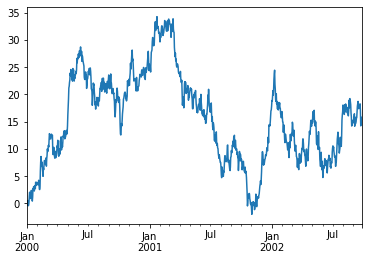

In [196]:
ts.plot()

In [198]:
df = pd.DataFrame(
        np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
   )

In [201]:
df = df.cumsum()

In [202]:
df

,A,B,C,D
2000-01-01,0.505417,-1.106344,-0.357799,-0.236116
2000-01-02,0.281688,-1.275548,0.385583,-0.477859
2000-01-03,-0.195248,-1.307950,1.331224,-0.815985
2000-01-04,0.749040,-2.697692,2.169197,-0.198697
2000-01-05,0.668310,-3.224774,3.515834,0.103920
...,...,...,...,...
2002-09-22,-16.162606,-15.294293,32.708332,9.508734
2002-09-23,-16.996884,-16.279987,32.714638,9.094547
2002-09-24,-16.090969,-17.448685,33.165014,9.027688
2002-09-25,-16.602132,-17.775036,32.410618,8.670630


<Figure size 432x288 with 0 Axes>

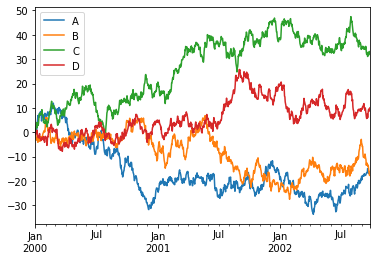

In [203]:
plt.figure()
df.plot()
plt.legend(loc='best')